# Use a pretrained model from from Keras
Import weight matrices from HDF5-files exported from Keras/Tensorflow

### Keras/Tensorflow side:

```Python
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras

mdl = VGG16(weights="imagenet")
mdl.save_weights("vgg16keras.h5", save_format="h5")
```

... that's it.

In [1]:
using HDF5
using Knet, CUDA
using Images, Colors
using NNHelferlein
using Augmentor

┌ Info: Precompiling NNHelferlein [b9e938e5-d80d-48a2-bb0e-6649b4a98aeb]
└ @ Base loading.jl:1278


In [2]:
model_file = "vgg16keras.h5"

"vgg16keras.h5"

In [3]:
h = h5open(model_file)

🗂️ HDF5.File: (read-only) vgg16keras.h5
├─ 🏷️ backend
├─ 🏷️ keras_version
├─ 🏷️ layer_names
├─ 📂 block1_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_pool
│  └─ 🏷️ weight_names
├─ 📂 block2_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_pool
│  └─ 🏷️ weight_names
├─ 📂 block3_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv3
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv3
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_pool
│  └─ 🏷️ weight_names
├─ 📂 block4_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block4_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0

In [ ]:
read(h, "fc1/fc1/kernel:0")

### Build VGG net:

In [5]:
vgg = Classifier(
            Conv(h, "block1_conv1"),
            Conv(h, "block1_conv2"),
            Pool(2,2),
            Conv(h, "block2_conv1"),
            Conv(h, "block2_conv2"),
            Pool(2,2),
            Conv(h, "block3_conv1"),
            Conv(h, "block3_conv2"),
            Conv(h, "block3_conv3"),
            Pool(2,2),
            Conv(h, "block4_conv1"),
            Conv(h, "block4_conv2"),
            Conv(h, "block4_conv3"),
            Pool(2,2),
            Conv(h, "block5_conv1"),
            Conv(h, "block5_conv2"),
            Conv(h, "block5_conv3"),
            Pool(2,2),
            PyFlat(python=true),
            Dense(h, "fc1", actf=relu),
            Dense(h, "fc2", actf=relu),
            Predictions(h, "predictions"))

Generating layer from hdf with kernel (3,3), 3 channels, 64 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 64 channels, 64 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 64 channels, 128 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 128 channels, 128 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 128 channels, 256 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 256 channels, 512 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and (1, 1) padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and (1, 1) padding.
Gener

Classifier((Conv(Float32[0.42947057 0.373467 -0.061360113; 0.27476987 0.038680777 -0.36722335; -0.05746817 -0.26224968 -0.35009676]

Float32[0.55037946 0.44007453 -0.081387036; 0.34573907 0.040632207 -0.4535013; -0.058634914 -0.33066967 -0.4850302]

Float32[0.4800154 0.4085474 -0.06514555; 0.31047726 0.050202366 -0.40338343; -0.050871685 -0.2852275 -0.41851634]

Float32[0.11727387 0.16206263 0.135694; 0.14835016 0.20229845 0.16168842; 0.12934428 0.17157242 0.13871045]

Float32[0.020877438 0.04734124 0.041854385; 0.03104937 0.06581022 0.046257496; 0.03167877 0.054710105 0.042319585]

Float32[-0.17269668 -0.17037505 -0.15435153; -0.18760149 -0.17757156 -0.17439997; -0.16600266 -0.16666673 -0.1570488]

Float32[0.03401296 0.0017086314 -0.115694344; 0.16155984 0.15641426 -0.08993654; 0.012903022 5.4455522f-5 -0.1253398]

Float32[0.098831154 0.051381946 -0.1017633; 0.24075055 0.2203114 -0.066743836; 0.07595883 0.048679758 -0.11207631]

Float32[0.037557714 -0.004962974 -0.13803807; 0.16659534

# Predict images:

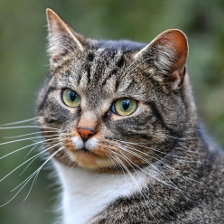

In [19]:
load("../data/elecat_224/cat-224.png")

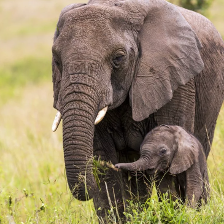

In [20]:
load("../data/elecat_224/ele-224.png")

In [6]:
imgs = mk_image_minibatch("../data/elecat_224", 16, train=false, pre_proc=preproc_imagenet)

ImageLoader("../data/elecat_224", ["../data/elecat_224/cat-224.png", "../data/elecat_224/ele-224.png"], [1, 1], ["unknown_class"], 16, true, false, nothing, NNHelferlein.preproc_imagenet)

In [7]:
pipl = CropRatio(ratio=1.0) |> Resize(224,224)
imgs2 = mk_image_minibatch("../data/elecat", 16, train=false, aug_pipl=pipl, pre_proc=preproc_imagenet)

ImageLoader("../data/elecat", ["../data/elecat/cat.jpg", "../data/elecat/elephant.jpg"], [1, 1], ["unknown_class"], 16, true, false, 2-step Augmentor.ImmutablePipeline:
 1.) Crop to 1:1 aspect ratio
 2.) Resize to 224×224, NNHelferlein.preproc_imagenet)

In [10]:
x = first(imgs2)

224×224×3×2 Array{Float32,4}:
[:, :, 1, 1] =
 -32.939  -32.939  -32.939  -32.939  …  -52.939  -50.939  -49.939  -47.939
 -30.939  -32.939  -31.939  -32.939     -48.939  -46.939  -49.939  -47.939
 -30.939  -29.939  -29.939  -29.939     -46.939  -45.939  -45.939  -44.939
 -28.939  -30.939  -29.939  -28.939     -45.939  -43.939  -45.939  -43.939
 -28.939  -30.939  -30.939  -31.939     -43.939  -42.939  -45.939  -43.939
 -30.939  -29.939  -29.939  -29.939  …  -42.939  -43.939  -39.939  -39.939
 -30.939  -29.939  -29.939  -29.939     -42.939  -40.939  -37.939  -37.939
 -30.939  -30.939  -30.939  -31.939     -39.939  -39.939  -36.939  -35.939
 -31.939  -33.939  -31.939  -32.939     -35.939  -35.939  -35.939  -33.939
 -30.939  -30.939  -31.939  -32.939     -31.939  -31.939  -33.939  -32.939
 -31.939  -30.939  -32.939  -32.939  …  -32.939  -32.939  -32.939  -32.939
 -28.939  -32.939  -32.939  -32.939     -30.939  -30.939  -30.939  -30.939
 -30.939  -31.939  -32.939  -32.939     -27.939  -27.93

In [11]:
vgg(x)

1000×2 Array{Float32,2}:
 -0.945427   3.18059
  0.601098  -1.21708
 -3.17137   -2.32378
 -1.59488    0.250045
 -3.46108    0.579682
 -1.15518    1.95889
 -4.69415    2.3298
 -0.96068    3.04401
 -1.41105    6.41559
 -0.575874   7.21777
 -1.79322   -0.300324
 -1.54671   -1.07903
 -0.447105   3.05797
  ⋮         
  2.04575   -0.728848
  1.49518   -1.20549
 -1.26163   -1.2678
 -1.87811   -1.32749
 -4.3291    -1.71992
 -3.52547    1.69273
 -3.69135    0.219818
 -2.9367     1.92811
 -2.93143    1.85778
 -2.49449    2.57854
  7.43323    1.08149
  4.78986   -0.408616

Use predict from NNHelferlein-Package:   
(ImageNet class-numbers differs by 1, because they are 0..999)

In [12]:
y = predict_imagenet(vgg, imgs2)

top-5 hits for sample 1: [283, 282, 286, 288, 723]
softmax       #   class label
   0.49     283   " 282: 'tiger cat'"
   0.47     282   " 281: 'tabby, tabby cat'"
   0.04     286   " 285: 'Egyptian cat'"
   0.00     288   " 287: 'lynx, catamount'"
   0.00     723   " 722: 'ping-pong ball'"
 
top-5 hits for sample 2: [387, 102, 386, 347, 24]
softmax       #   class label
   0.61     387   " 386: 'African elephant, Loxodonta africana'"
   0.25     102   " 101: 'tusker'"
   0.11     386   " 385: 'Indian elephant, Elephas maximus'"
   0.01     347   " 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis'"
   0.00      24   " 23: 'vulture'"
 


1000×2 Array{Float32,2}:
 -0.945427   3.18059
  0.601098  -1.21708
 -3.17137   -2.32378
 -1.59488    0.250045
 -3.46108    0.579682
 -1.15518    1.95889
 -4.69415    2.3298
 -0.96068    3.04401
 -1.41105    6.41559
 -0.575874   7.21777
 -1.79322   -0.300324
 -1.54671   -1.07903
 -0.447105   3.05797
  ⋮         
  2.04575   -0.728848
  1.49518   -1.20549
 -1.26163   -1.2678
 -1.87811   -1.32749
 -4.3291    -1.71992
 -3.52547    1.69273
 -3.69135    0.219818
 -2.9367     1.92811
 -2.93143    1.85778
 -2.49449    2.57854
  7.43323    1.08149
  4.78986   -0.408616